<a href="https://colab.research.google.com/github/UW-ERSL/TOuNN/blob/main/TOuNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# run this first time to clone the directory 
!git clone https://github.com/UW-ERSL/TOuNN.git
%cd TOuNN/

### Imports

In [ ]:
import numpy as np
import time
from TOuNNOptimizer import TopologyOptimizer
import matplotlib.pyplot as plt

### Mesh 

In [ ]:
nelx = 60; # number of FE elements along X
nely = 30; # number of FE elements along Y
elemSize = np.array([1.0,1.0]);
mesh = {'nelx':nelx, 'nely':nely, 'elemSize':elemSize};

### Material

In [ ]:
matProp = {'E':1.0, 'nu':0.3}; # Structural
matProp['penal'] = 1; # SIMP penalization constant, starting value

### Boundary Condition

In [ ]:
exampleName = 'TipCantilever'
physics = 'Structural'
ndof = 2*(nelx+1)*(nely+1);
force = np.zeros((ndof,1))
dofs=np.arange(ndof);
fixed = dofs[0:2*(nely+1):1];
force[2*(nelx+1)*(nely+1)-2*nely+1, 0 ] = -1;
symXAxis = {'isOn':False, 'midPt':0.5*nely};
symYAxis = {'isOn':False, 'midPt':0.5*nelx};
bc = {'exampleName':exampleName, 'physics':physics, \
      'force':force, 'fixed':fixed, 'symXAxis':symXAxis, 'symYAxis':symYAxis };

# For more BCs see examples.py

### NN Settings

In [ ]:
nnSettings = {'numLayers':3, 'numNeuronsPerLyr':20 }

### Constraints and Projections

In [ ]:
densityProjection = {'isOn':True, 'sharpness':8};
desiredVolumeFraction = 0.6;

### Optimizer settings

In [ ]:
minEpochs = 150; # minimum number of iterations
maxEpochs = 500; # Max number of iterations

Running on CPU


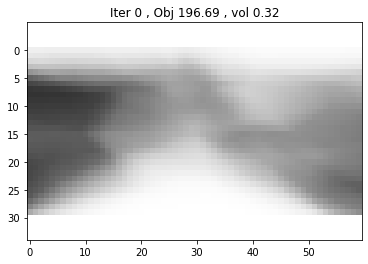

Iter 0 , Obj 196.69 , vol 0.32


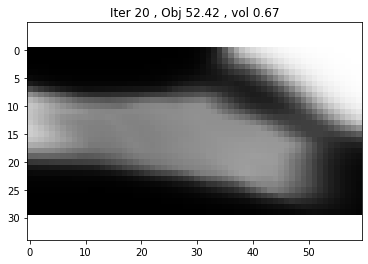

Iter 20 , Obj 52.42 , vol 0.67


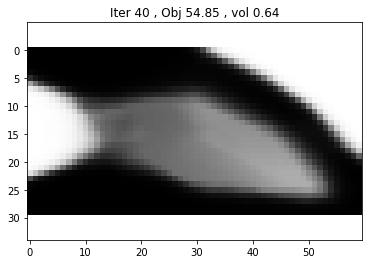

Iter 40 , Obj 54.85 , vol 0.64


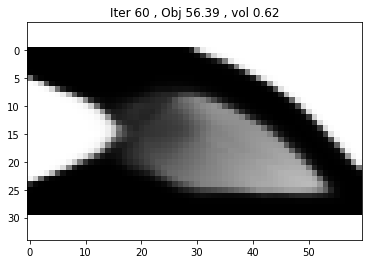

Iter 60 , Obj 56.39 , vol 0.62


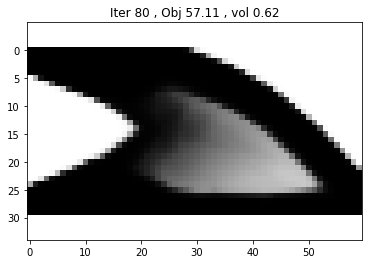

Iter 80 , Obj 57.11 , vol 0.62


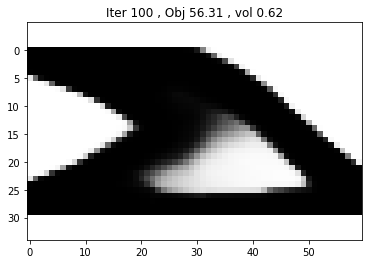

Iter 100 , Obj 56.31 , vol 0.62


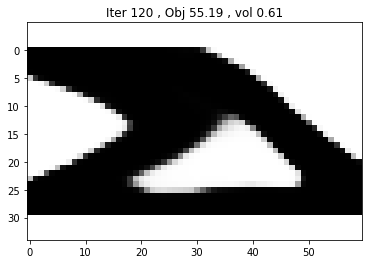

Iter 120 , Obj 55.19 , vol 0.61


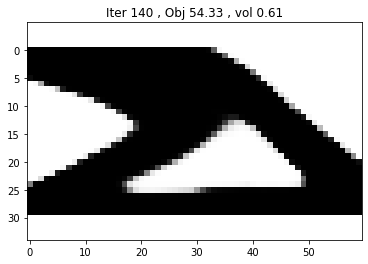

Iter 140 , Obj 54.33 , vol 0.61


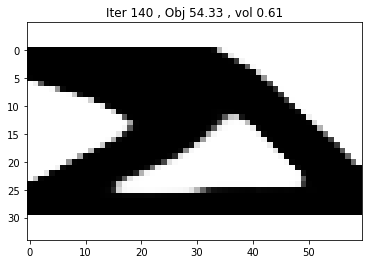

151 J: 54.12; Vf: 0.610; loss: 0.277; relGreyElems: 0.014 
Final J : 54.122


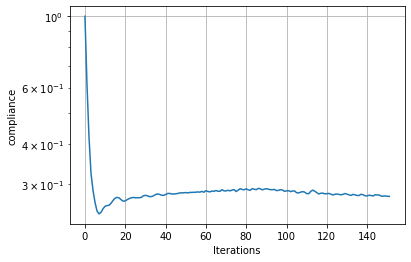

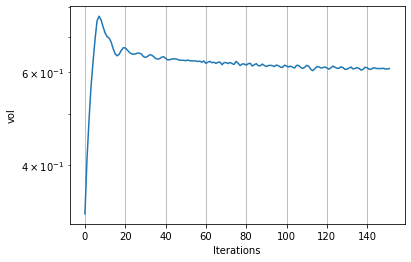

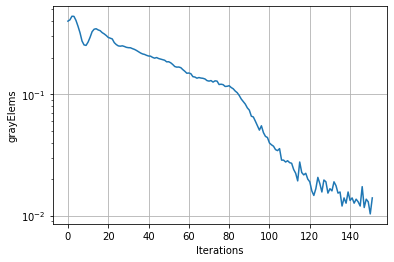

<Figure size 432x288 with 0 Axes>

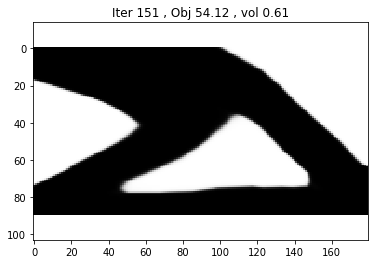

Time taken (secs): 4.23


In [ ]:
plt.close('all');
overrideGPU = False
start = time.perf_counter()
topOpt = TopologyOptimizer(mesh, matProp, bc, nnSettings, \
                  desiredVolumeFraction, densityProjection, overrideGPU);
topOpt.optimizeDesign(maxEpochs,minEpochs);
print("Time taken (secs): {:.2F}".format( time.perf_counter() - start))